# Analytics Intern Test Report

In [3]:
 %matplotlib inline

## Reading the CSV file

In [377]:
import pandas as pd
df = pd.read_csv("Downloads/brands_data.csv", sep=',')
df.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States
1,NaN,NaN,NaN,2018-01-02,2018-01-12,1,False,NaN
2,NaN,NaN,NaN,2018-01-03,2018-01-03,1,False,NaN
3,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN
4,NaN,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN


In [16]:
import matplotlib.pylab as plt

(2041, 8)

## Dropping rows with NaN values in 'names' attribute

In [378]:
df.dropna(subset=["name"], axis=0, inplace=True)
# reset index, because we droped NaN rows
df.reset_index(drop=True, inplace=True)
df.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States
1,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN
2,Stargraph,/automotive and vehicles/motorcycles,NaN,2018-01-04,2018-08-28,1,False,NaN
3,Enflux,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN
4,Major League Girls,/sports/softball,NaN,2018-01-05,2018-01-07,1,False,NaN


## Drop the field 'saw_discovery' as the value is False for all instances

In [192]:
df.dtypes
df=df.drop(['saw_discovery'],axis=1)

## Statistical report of the dataframe that includes categorical features 

In [193]:
df['product_category'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns
df.describe(include='all')

,name,brand_category,product_category,created,last_active,last_onboarding_step,address_country
count,782,231,575,782,782,782.000000,551
unique,775,101,31,396,411,NaN,48
top,Plumdrop,/art and entertainment/shows and events,Apparel & Jewelry,2018-05-25,2018-08-23,NaN,United States
freq,2,28,100,10,8,NaN,389
mean,NaN,NaN,NaN,NaN,NaN,2.382353,NaN
std,NaN,NaN,NaN,NaN,NaN,0.821195,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN


In [80]:
df1=df['product_category'].notnull()
df1=df[df1]
df1.reset_index(drop=True, inplace=True)
df1
df2=pd.DataFrame(df1['product_category'].value_counts(ascending=True))
df2.columns=['count']
df2

,count
Health Care Supplies,1
Footwear,1
Golf Courses,1
Utilities,1
Food Distributors,1
Belts,1
Sport & Fitness Centers,2
Energy,2
Real Estate,2
Banks,3


# Bar plot that describes which product categories were frequent among the brands that didn't upgrade to paid subscription

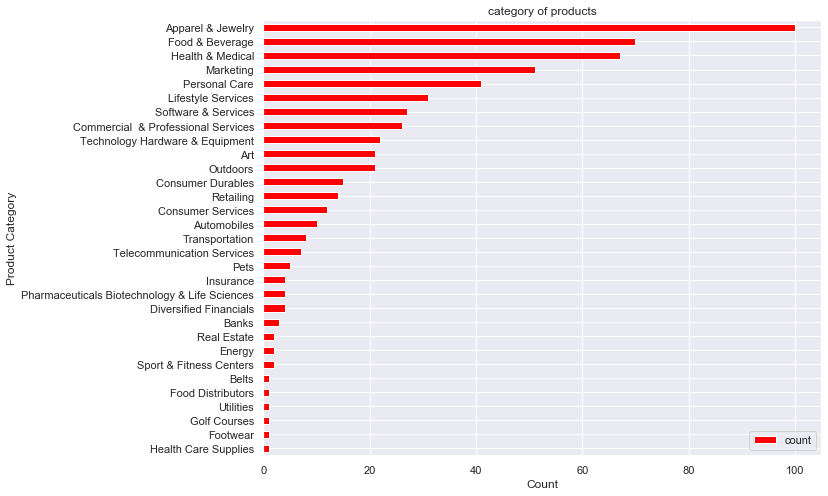

In [366]:
df2.plot(kind='barh',figsize=(10, 8),color='red')

plt.title('category of products')
plt.ylabel('Product Category')
plt.xlabel('Count')
plt.legend(loc='lower right')
plt.show()

# Top brand categories that didn't continue to paid subscription

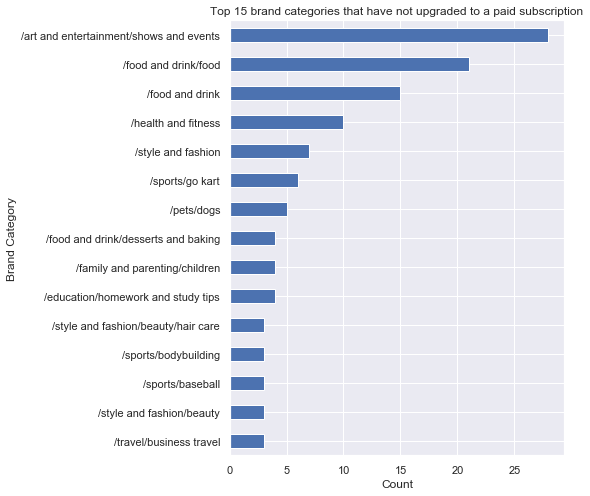

In [327]:
df_brandcat=df['brand_category'].notnull()
df_brandcat=df[df_brandcat]
df_brandcat.reset_index(drop=True, inplace=True)
df3=df_brandcat['brand_category'].value_counts(ascending=True)
df4=df3.tail(15)
df4.plot(kind='barh',figsize=(6,8))

plt.title('Top 15 brand categories that have not upgraded to a paid subscription')
plt.ylabel('Brand Category')
plt.xlabel('Count') 
plt.show()

> #### From the above plot, it can be observed that following brand categories were the mainly the ones who decided not to continue with paid subscription:
1. /art and entertainment/shows and events
2. /food and drink/food
3. /food and drink
4. /health and fitness
5. /style and fashion
6. /sports/go kart
7. /pets/dogs

> and few others

>The brands with above brand categories decided not to go with paid subscription as these brands mostly focuses on art,entertainment,style,fashion,food,drinks etc. so might not be interested to involve athlete or sports in general and that's probably why they didn't sign up.

### Brands from these top 5 countries decided not to sign up the deal 

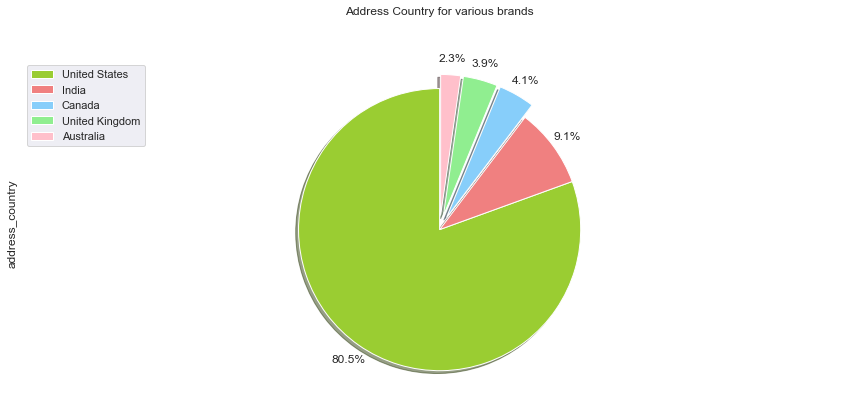

In [321]:
#df['address_country'].value_counts()
cntry=df['address_country'].value_counts().head(5)
colors_list = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
cntry.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Address Country for various brands', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=cntry.index, loc='upper left') 

plt.show()

> Among all the 48 countries in the given dataset, most brands from these top 5 countries decided not to sign up the deal. USA based brands might not be interested to sign a sportperson for the deal which accounts for about 389 brands,as these brands mostly falls under art and entertainment/shows and events and other non-sport related categories. Among other countries, India, Canada, United Kingdom and Australia based brands might have less interest to consider a US based athlete on OpenSponsorship.

### Average number of days for which a brand category remained active on OpenSponsorship

In [432]:
import numpy as np
from datetime import datetime
diff=[]
for d1,d2 in zip(df.created,df.last_active):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    diff.append(abs(d1-d2).days)

In [197]:
diff.shape

782

In [296]:
diff=pd.DataFrame(diff)
frames=[df,diff]
data=pd.concat(frames,axis=1)
data.rename(columns={0:'days_active'},inplace=True)
data=data[['brand_category','days_active']]
data=data[data['brand_category'].notnull()]
data.reset_index(drop=True,inplace=True)
data=data.groupby(['brand_category']).mean()
data=data[data.days_active!=0]
data.reset_index(inplace=True)
data

,brand_category,days_active
0,/art and entertainment,31.000000
1,/art and entertainment/books and literature/fa...,114.000000
2,/art and entertainment/comics and animation,1.000000
3,/art and entertainment/movies and tv/movies,2.000000
4,/art and entertainment/movies and tv/television,111.000000
...,...,...
67,/technology and computing/internet technology/...,435.000000
68,/technology and computing/operating systems,13.000000
69,/travel/business travel,87.666667
70,/travel/transports/sea travel,454.000000


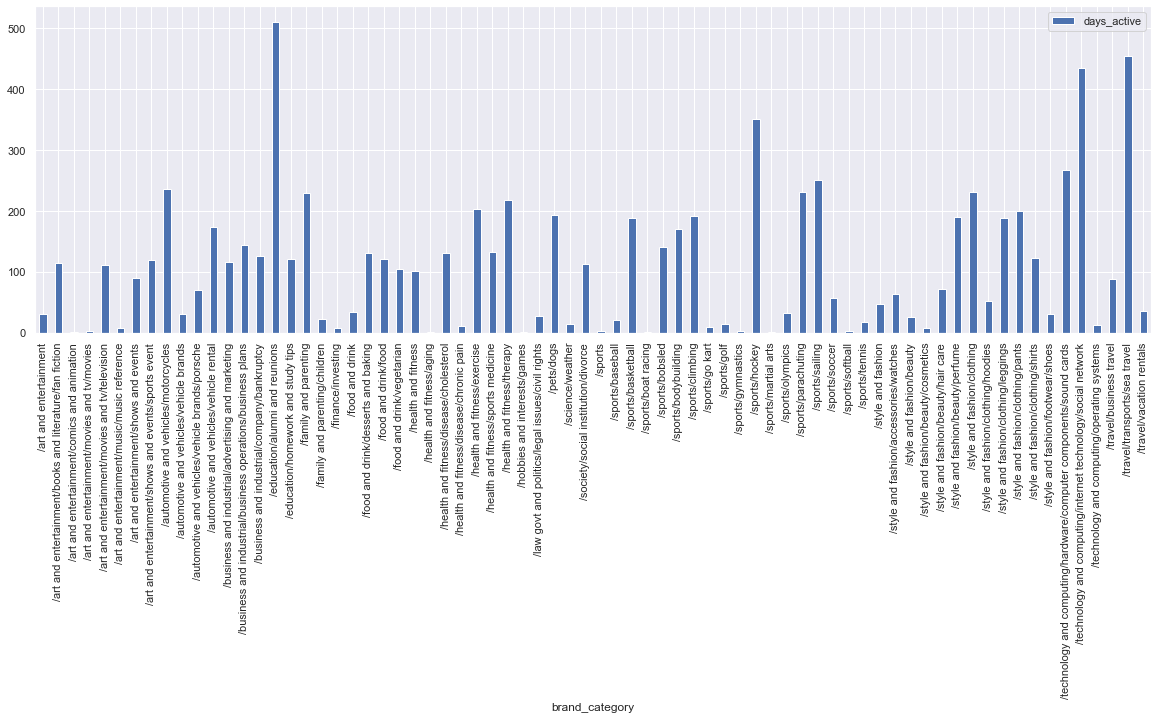

In [365]:
data.plot(kind='bar',x='brand_category',y='days_active',figsize=(20,6))

> From the above plot, it can be observed that brand categories like education/alumni and reunions, sports/hockey, technology/and computing/internet technology/social media, travel/transport/sea travel and few others were active for many days but still decided to unsubscribe as they might not have got a better candidate to work with who can execute deliverables or was not able to acheive the best ROI on the dashboard. 

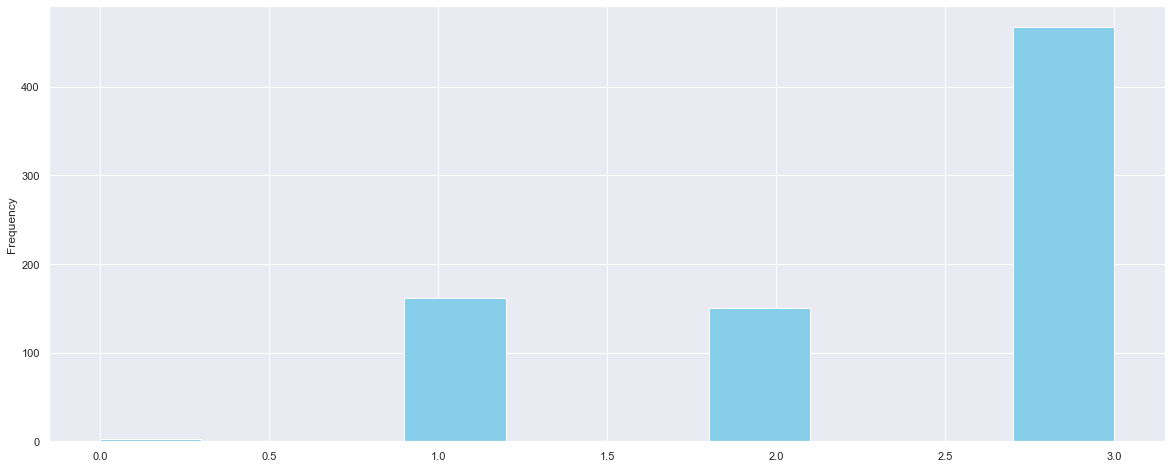

In [363]:
df['last_onboarding_step'].plot.hist(color='skyblue')

> The above plot shows the frequency of last onboarding step for given brands. Most brands has a value of 3 corresponding to this feature which might be related to the progress a particular brand made on OpenSponsorship dashboard. Among total 782 brands, 467 brands left the plan at a later stage where they apparently got an idea of ROI and the campaign progress.
Whereas, only 3 brands were there which decided not to continue with the marketing deal at an initial stage, with onboarding step 0. This might have happened as they were not ready to invest on sports and were probably taking a demo.